# Risk parity
ETF investing
### Load config

In [1]:
import yaml
import datetime
import pandas as pd
import numpy as np

from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

with open("../config.yaml") as f:
    config = yaml.safe_load(f)
    

client = StockHistoricalDataClient(config['alpaca']['key'], config['alpaca']['secret'])

### Get historical data

In [2]:
assets = ["SPY", "IEF", "TLT", "GLD", "VNQ"]
# assets = ["SPY", "IEF", "GLD"]

request_params = StockBarsRequest(
                        symbol_or_symbols=assets,
                        timeframe=TimeFrame.Day,
                        start=datetime.datetime(2015, 12, 1),
                        end=datetime.datetime(2022, 1, 1)
                 )

bars = client.get_stock_bars(request_params).df
bars

open    high      low   close  \
symbol timestamp                                                     
GLD    2015-12-01 05:00:00+00:00  102.300  102.43  101.810  102.28   
       2015-12-02 05:00:00+00:00  101.350  101.35  100.530  100.69   
       2015-12-03 05:00:00+00:00  101.230  101.97  100.845  101.76   
       2015-12-04 05:00:00+00:00  102.740  104.21  102.650  104.02   
       2015-12-07 05:00:00+00:00  103.320  103.37  102.500  102.67   
...                                   ...     ...      ...     ...   
VNQ    2021-12-27 05:00:00+00:00  112.022  114.02  112.022  114.00   
       2021-12-28 05:00:00+00:00  113.930  114.54  113.670  114.42   
       2021-12-29 05:00:00+00:00  114.650  115.44  114.050  115.19   
       2021-12-30 05:00:00+00:00  115.240  116.17  115.240  115.69   
       2021-12-31 05:00:00+00:00  115.710  116.71  115.650  116.01   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2015-12-01 05:00:00+00:00   4645916.0      19450.0  102.161847  
       2015-12-02 05:00:00+00:00  10223492.0      42784.0  100.947089  
       2015-12-03 05:00:00+00:00   6499935.0      30659.0  101.426721  
       2015-12-04 05:00:00+00:00  10670249.0      48021.0  103.717041  
       2015-12-07 05:00:00+00:00   4393461.0      23083.0  102.879428  
...                                      ...          ...         ...  
VNQ    2021-12-27 05:00:00+00:00   9161721.0      89075.0  113.000222  
       2021-12-28 05:00:00+00:00   3626887.0      46575.0  114.255235  
       2021-12-29 05:00:00+00:00   3818659.0      49441.0  114.833940  
       2021-12-30 05:00:00+00:00   3990081.0      56245.0  115.733918  
       2021-12-31 05:00:00+00:00   5431572.0      54559.0  116.210185  

[7665 rows x 7 columns]

In [3]:
c = bars.close.unstack().transpose().dropna()
o = bars.open.unstack().transpose().dropna()
returns = c / o - 1
# returns = c.pct_change().dropna()
# log_returns = np.log(returns + 1).dropna()
returns

symbol,GLD,IEF,SPY,TLT,VNQ
timestamp,,,,,
2015-12-01 05:00:00+00:00,-0.000196,0.005271,0.005921,0.012947,0.012453
2015-12-02 05:00:00+00:00,-0.006512,-0.000563,-0.009904,0.001712,-0.017568
2015-12-03 05:00:00+00:00,0.005236,-0.006130,-0.015419,-0.015079,-0.014226
2015-12-04 05:00:00+00:00,0.012459,0.001705,0.017178,0.008784,0.018151
2015-12-07 05:00:00+00:00,-0.006291,0.002646,-0.004206,0.007781,-0.001140
...,...,...,...,...,...
2021-12-27 05:00:00+00:00,0.002427,0.000694,0.011016,0.002829,0.017657
2021-12-28 05:00:00+00:00,-0.004075,-0.001817,-0.001779,-0.008757,0.004301
2021-12-29 05:00:00+00:00,0.007349,-0.001914,0.001048,-0.001634,0.004710


In [4]:
correlation = returns.groupby(pd.Grouper(freq='M')).corr()
standard_deviation = returns.groupby(pd.Grouper(freq='M')).std()
covariance = returns.groupby(pd.Grouper(freq='M')).cov()

covariance

symbol                                 GLD           IEF           SPY  \
timestamp                 symbol                                         
2015-12-31 00:00:00+00:00 GLD     0.000032  1.764608e-06  3.980664e-06   
                          IEF     0.000002  6.852963e-06  4.079858e-07   
                          SPY     0.000004  4.079858e-07  6.888907e-05   
                          TLT     0.000005  1.574120e-05  7.688722e-06   
                          VNQ     0.000008  5.908925e-06  6.524505e-05   
...                                    ...           ...           ...   
2021-12-31 00:00:00+00:00 GLD     0.000020  2.805963e-06  1.456933e-06   
                          IEF     0.000003  6.502839e-06 -1.523848e-05   
                          SPY     0.000001 -1.523848e-05  9.156583e-05   
                          TLT     0.000005  1.613426e-05 -3.613680e-05   
                          VNQ     0.000007 -1.256550e-05  7.478209e-05   

symbol                                 TLT       VNQ  
timestamp                 symbol                      
2015-12-31 00:00:00+00:00 GLD     0.000005  0.000008  
                          IEF     0.000016  0.000006  
                          SPY     0.000008  0.000065  
                          TLT     0.000042  0.000016  
                          VNQ     0.000016  0.000087  
...                                    ...       ...  
2021-12-31 00:00:00+00:00 GLD     0.000005  0.000007  
                          IEF     0.000016 -0.000013  
                          SPY    -0.000036  0.000075  
                          TLT     0.000056 -0.000029  
                          VNQ    -0.000029  0.000110  

[365 rows x 5 columns]

### Marginal risk contribution and risk parity

Denote $\bold{\Sigma}$ to be the covariance matrix of the returns $\bold{X}$. Given asset allocation $\bold{w}$, the portfolio variance is $\bold{w}^T \Sigma \bold{w}$. The marginal risk contribution $MRC_i$ is given by $w_i (\bold{\Sigma}\bold{w})_{i}$. Note that $\sum MRC_i = \bold{w}^T \Sigma \bold{w}$. We define the risk allocation of asset $i$ as $\frac{MRC_i}{\bold{w}^T \Sigma \bold{w}}$. The target risk allocation vector $\bold{b}$ is the equal weight vector of $(\frac{1}{n}, \frac{1}{n}, ..., \frac{1}{n})^T$ where $n$ is the number of assets. We define the L2 norm of the distance between between the risk allocation vector and the $\bold{b}$ as the *risk allocation constraint*.


Other notes: $\text{cov}(w_i X_i, w_j X_j) = w_i w_j \sigma_i \sigma_j \rho_{ij} \implies MRC_i = w_i \sigma_i \sum_j(w_j \sigma_j \rho_{ij} )$ where $\sigma$ is standard deviation and $\rho$ is correlation. Sometimes the risk allocation problem is defined in terms of $\sigma, \rho$ instead of $\Sigma$.


For the function definitions below, `i` refers to the index of asset $i$, `w` is refers to $\bold{w}$, and `cov` refers to covariance matrix $\Sigma$.

In [5]:
# Returns marginal risk contribution of asset i
def mrc(i: int, w: np.ndarray, cov: pd.DataFrame):
    return w[i] * cov.iloc[i].dot(w) 

# Returns overall portfolio variance
def total_variance(w: np.ndarray, cov: pd.DataFrame):
    return w.T.dot(cov).dot(w)

# Returns a vector that sums to 1 with the i-th element being the fraction of total variance asset i accounts for
def risk_allocation(w: np.ndarray, cov: pd.DataFrame):
    return ((w * cov).T * w).sum() / total_variance(w, cov)

# Returns the L2 norm of distance between risk allocation vector and target risk allocation vector
def risk_allocation_constraint(w: np.ndarray, cov: pd.DataFrame):
    equal_weights = np.ones(len(w)) / len(w)
    return np.linalg.norm(risk_allocation(w, cov) - equal_weights)

timestamps = covariance.index.get_level_values(0).unique()
n = len(covariance.keys())

Naive version of basic problem formulation (find any solution that allocates equal risk):

We want to find weights $\bold{w}$ that minimises the *risk allocation constraint* such that 

1. $\sum w_i = 1$ (adds up to entire portfolio)
2. $w_i \geq 0$ for all $i$ (no short positions allowed)

Notes for optimisation: this problem has linear constraints with a non-linear objective. 

For the sake of brevity the details of the experiment is omitted but the naive formulation is not computationally friendly due to the non-convex objective (computation time was much longer and did not find a risk parity solution in some instances).


Instead, we do a change of variable $\bold{x} = \frac{\bold{w}}{\sqrt{\bold{w}^T \Sigma \bold{w}}}$.
Then the $MRC_i$ equations of $w_i (\bold{\Sigma}\bold{w})_{i} = b_i\bold{w}^T \Sigma \bold{w}$ give us

$
\frac{w_i}{\bold{w}^T \Sigma \bold{w}} (\bold{\Sigma}\bold{w})_{i} = b_i \\
\implies x_i \frac{(\bold{\Sigma}\bold{w})_{i}}{\sqrt{\bold{w}^T \Sigma \bold{w}}} = b_i \\
\implies (\bold{\Sigma}\bold{x})_{i} = \frac{b_i}{x_i} \\
\implies \bold{\Sigma}\bold{x} = \frac{\bold{b}}{\bold{x}}
$

$\bold{w}$ can be recovered by normalising $\bold{x} / \bold{1}^T\bold{x}$ since $\bold{x}$ is just the weight vector scaled by a common constant.

It is known in the literature that there exists a different problem formulation based on this change of variable that has a convex objective function and solves the same basic risk parity problem, which is to minimize $\frac{1}{2}\bold{x}^T \Sigma \bold{x} - \bold{b}^T\text{log}(\bold{x})$ where $\bold{x} \geq 0$. It has been shown that the optimiality conditions of this problem gives us a solution to the $MRC$ equations.

In [6]:
from scipy.optimize import minimize 

def objective(x, cov):
    equal_weights = np.ones(len(x)) / len(x)
    return 0.5 * x.T.dot(cov).dot(x) - equal_weights.dot(np.log(x))

weights_list = [] 
risk_allocation_list = [] 
risk_constraint_list = [] 
result_list = []
variance_list = []

for month in timestamps:
    cov = covariance.loc[month]

    # x >= 0 constraint
    bounds = [(0, None)] * n

    result = minimize(
        objective,
        np.ones(n) / n,
        bounds=bounds,
        args=(cov,),
        tol=1e-8
    )

    solution = result.x / np.sum(result.x)

    weights_list.append(solution)
    risk_allocation_list.append(risk_allocation(solution, cov))
    risk_constraint_list.append(risk_allocation_constraint(solution, cov))
    result_list.append([result.fun, result.success, result.message, total_variance(solution, cov)])

weights = pd.DataFrame(weights_list, index=timestamps, columns=covariance.keys())
results = pd.DataFrame(result_list, index=timestamps, columns=["fun", "success", "message", "variance"])
risk_allocations = pd.DataFrame(risk_allocation_list, index=timestamps, columns=covariance.keys())
risk_constraints = pd.DataFrame(risk_constraint_list, index=timestamps, columns=("value",))

<Axes: xlabel='timestamp'>

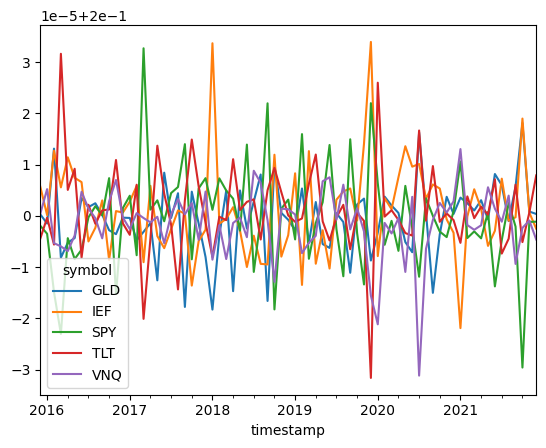

In [7]:
risk_allocations.plot()

<Axes: xlabel='timestamp'>

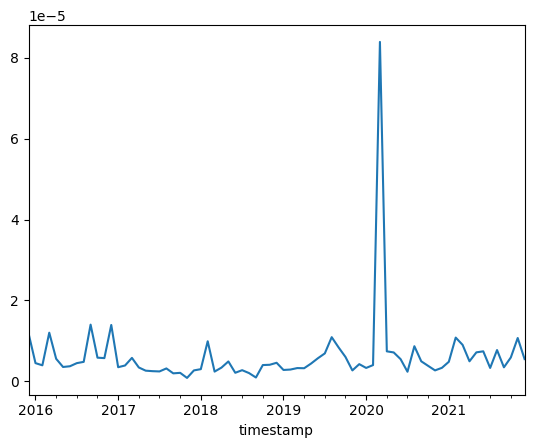

In [8]:
results.variance.plot()

### Additional experiment which did not yield meaningful results

Ideal problem formulation (minimize volatility while maintaining equal risk allocation):

We want to find weights $\bold{w}$ that minimises overall volatility $\bold{w}^T \Sigma \bold{w}$ such that 

1. The *risk allocation constraint* is less than some tolerance amount $\epsilon$
2. $\sum w_i = 1$ (adds up to entire portfolio)
3. $w_i \geq 0$ for all $i$ (no short positions allowed)

$\epsilon$ is empirically decided based on observation of the results in the basic problem.

Notes for optimisation: this problem has a non-convex quadratic constraint and a non-linear constraint.

In [9]:
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint

weights_list = []
risk_allocation_list = []
risk_constraint_list = []
result_list = []

for month in timestamps:
    cov = covariance.loc[month]

    # no shorting and cannot exceed entire portfolio
    bounds = [(0, 1)] * n

    constraints = [
        LinearConstraint(np.ones(n), 1, 1), # sum equals 1
        NonlinearConstraint(lambda w: risk_allocation_constraint(w, cov), 0, 1e-4) # equal risk allocation
    ]

    result = minimize(
        total_variance,
        weights.loc[month], # make use of previously found solutions as the starting point
        constraints=constraints,
        bounds=bounds,
        args=(cov,)
    )

    weights_list.append(result.x)
    risk_allocation_list.append(risk_allocation(result.x, cov))
    risk_constraint_list.append(risk_allocation_constraint(result.x, cov))
    result_list.append([result.fun, result.success, result.message])

weights = pd.DataFrame(weights_list, index=timestamps, columns=covariance.keys())
results2 = pd.DataFrame(result_list, index=timestamps, columns=["fun", "success", "message"])
risk_allocations = pd.DataFrame(risk_allocation_list, index=timestamps, columns=covariance.keys())
risk_constraints = pd.DataFrame(risk_constraint_list, index=timestamps, columns=("value",))

In [10]:
results2.fun / results.variance

timestamp
2015-12-31 00:00:00+00:00    1.0
2016-01-31 00:00:00+00:00    1.0
2016-02-29 00:00:00+00:00    1.0
2016-03-31 00:00:00+00:00    1.0
2016-04-30 00:00:00+00:00    1.0
                            ... 
2021-08-31 00:00:00+00:00    1.0
2021-09-30 00:00:00+00:00    1.0
2021-10-31 00:00:00+00:00    1.0
2021-11-30 00:00:00+00:00    1.0
2021-12-31 00:00:00+00:00    1.0
Length: 73, dtype: float64

`scipy.optimize.minimize` requires a starting point, so we make use of the previously found weights as the starting point for minimizing variance. However, the actual computation result does not yield any noticable reduction in variance. Either require a more powerful optimization package or alternate problem formulations.

One alternative problem formulation for future consideration: minimise *risk allocation constraint* + $\lambda\bold{w}^T \Sigma \bold{w}$ where we tweak $\lambda$ instead.